In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt


In [2]:
DIRECTORY= "/kaggle/input/livdet-2011/Livdet 2011/Italdata/training/"
CATEGORIES= ["fake","live"]

In [3]:
data=[]

for categories in CATEGORIES:
    #reach source folder
    folder=os.path.join(DIRECTORY,categories)
    label=CATEGORIES.index(categories)  
   
    #read images
    for img in os.listdir(folder):
        img=os.path.join(folder,img)   
       
        #convert read images to array
        img_arr=cv2.imread(img)
        img_arr=cv2.resize(img_arr,(300,300))
        data.append([img_arr,label])
        
        

In [4]:
random.shuffle(data)

In [5]:
#Seperating X and Y data
x=[] #features
y=[] #labels

for feature, label in data:
    x.append(feature)
    y.append(label)

x=np.array(x)
y=np.array(y)

In [6]:
#rescaling the features
x=x/255
x.shape

(2000, 300, 300, 3)

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense, Activation

2024-06-08 12:05:36.055455: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-08 12:05:36.055550: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-08 12:05:36.191900: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [22]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),input_shape=x.shape[1:],activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(24,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 298, 298, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 149, 149, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1420864)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │   181,870,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 24)             │         3,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,875,658 (693.80 MB)

 Trainable params: 181,875,658 (693.80 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [25]:
history= model.fit(x,y,epochs=5,validation_split=0.2)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - accuracy: 0.5407 - loss: 13.9612 - val_accuracy: 0.8075 - val_loss: 0.4939
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.8478 - loss: 0.3986 - val_accuracy: 0.8975 - val_loss: 0.3106
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9646 - loss: 0.1650 - val_accuracy: 0.9025 - val_loss: 0.2463
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9992 - loss: 0.0472 - val_accuracy: 0.9350 - val_loss: 0.1964
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 1.0000 - loss: 0.0124 - val_accuracy: 0.9575 - val_loss: 0.1487


In [ ]:
output_dir = '/kaggle/working'
model_path = os.path.join(output_dir, 'HighAccModel_5.h5')

# Save the model
model.save(model_path)

(0.0, 1.0)

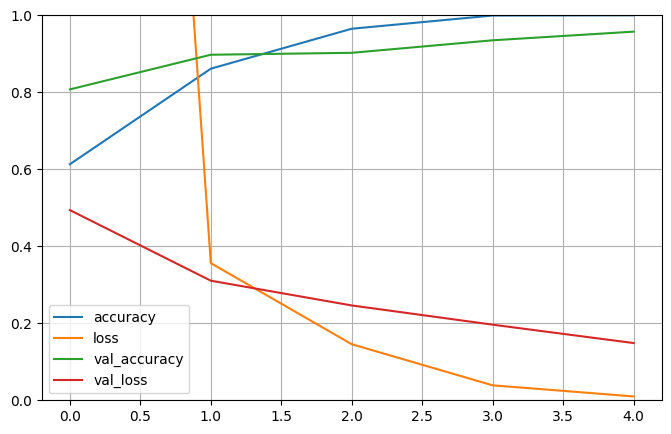

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [27]:
#prepage test data
TEST_DIRECTORY= "/kaggle/input/livdet-2011/Livdet 2011/Italdata/testing/"
CATEGORIES= ["fake","live"]

In [14]:
test_data=[]

for categories in CATEGORIES:
    #reach source folder
    folder=os.path.join(TEST_DIRECTORY,categories)
    label=CATEGORIES.index(categories)  
   
    #read images
    for img in os.listdir(folder):
        img=os.path.join(folder,img)   
       
        #convert read images to array
        img_arr=cv2.imread(img)
        img_arr=cv2.resize(img_arr,(300,300))
        test_data.append([img_arr,label])

In [29]:
random.shuffle(test_data)

In [30]:
x_test=[] #features
y_test=[] #labels

for feature, label in test_data:
    x_test.append(feature)
    y_test.append(label)

x_test=np.array(x_test)
y_test=np.array(y_test)
x_test=x_test/255


In [31]:
#Testing the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)
model.evaluate(x_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7652 - loss: 0.5720


[0.6364576816558838, 0.7695000171661377]

In [ ]:
output_dir = '/kaggle/working'
model_path = os.path.join(output_dir, 'HighAccModel_5.h5')

# Save the model
model.save(model_path)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred=model.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report \n",classification_report(y_test, y_pred_classes))

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      1000
           1       0.98      0.87      0.92      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



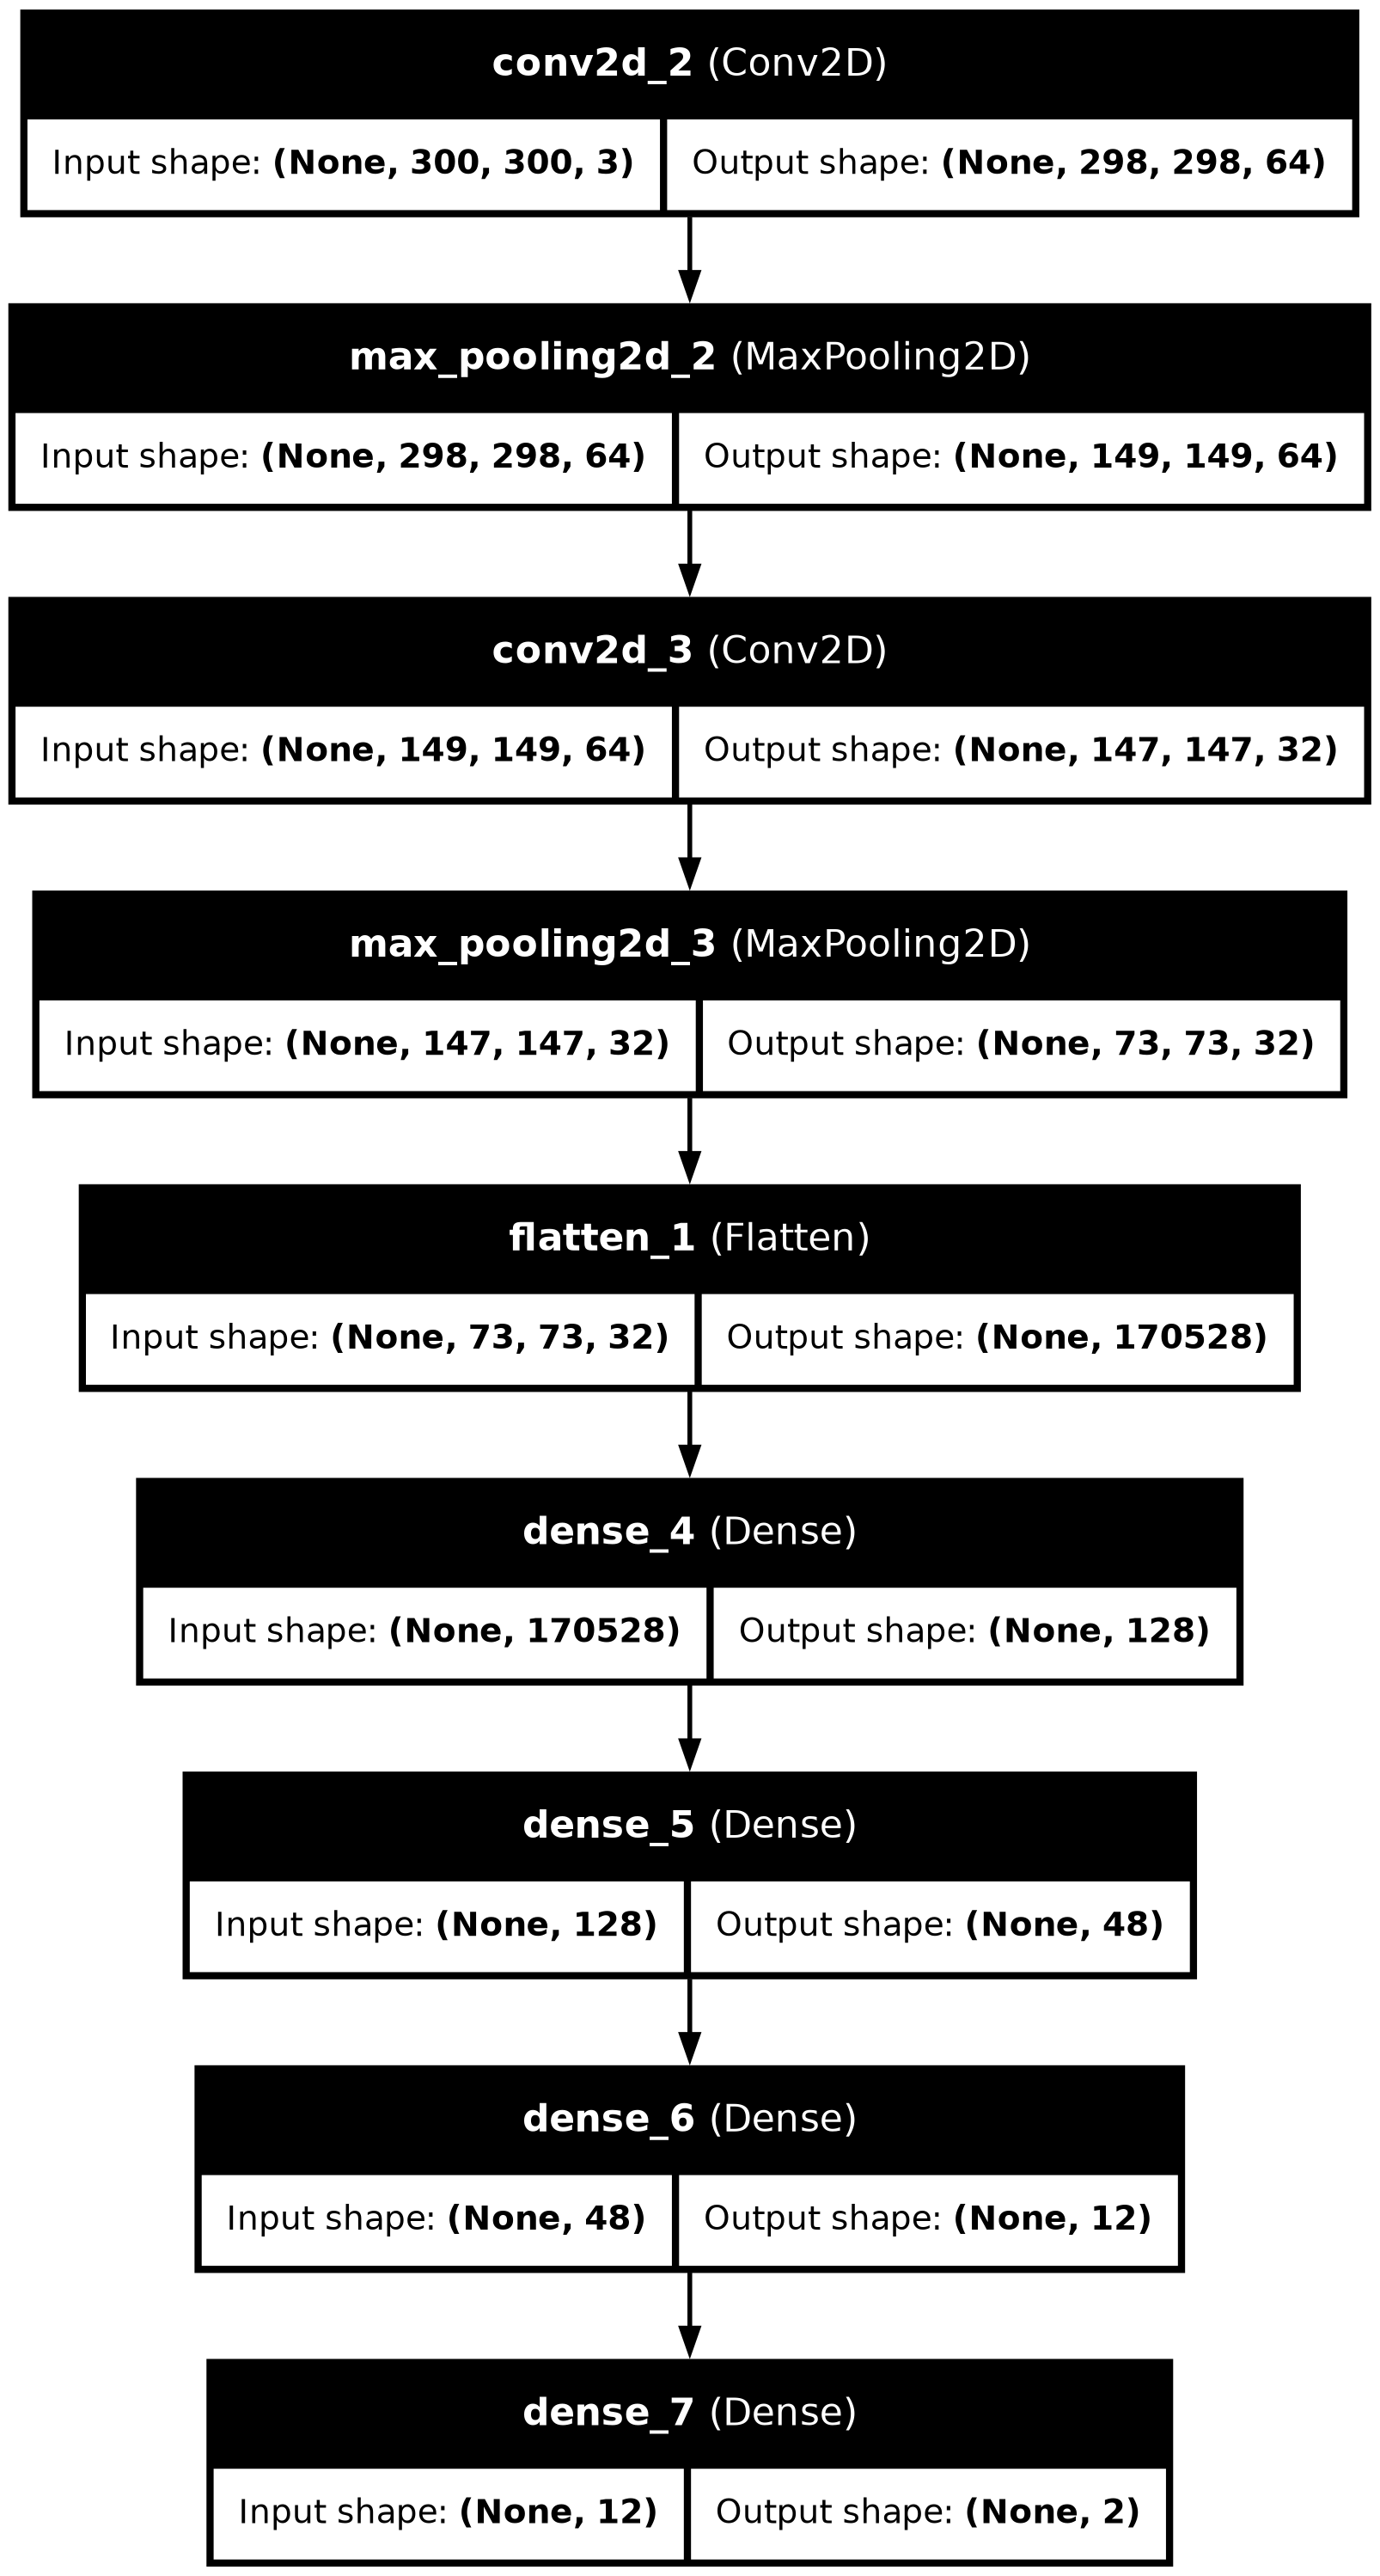

In [31]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)